# Natural Language Processing
---------------------------------------------------

This example shows how to use ATOM to quickly go from raw text data to model predictions.

Import the 20 newsgroups text dataset from [sklearn.datasets](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html). The dataset comprises around 18000 articles on 20 topics. The goal is to predict the topic of every article.

## Load the data

In [1]:
import numpy as np
from atom import ATOMClassifier
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Use only a subset of the available topics for faster processing
X_text, y_text = fetch_20newsgroups(
    return_X_y=True,
    categories=[
        'alt.atheism',
        'sci.med',
        'comp.windows.x',
        'misc.forsale',
        'rec.autos',
    ],
    shuffle=True,
    random_state=1,
)
X_text = np.array(X_text).reshape(-1, 1)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X_text, y_text, index=True, test_size=0.3, verbose=2, warnings=False)

<< ================== ATOM ================== >>
Algorithm task: multiclass classification.

Dataset stats ==================== >>
Shape: (2846, 2)
Memory: 5.15 MB
Scaled: False
Categorical features: 1 (100.0%)
-------------------------------------
Train set size: 1993
Test set size: 853
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   480 (1.0) |   336 (1.0) |   144 (1.0) |
| 1 |   593 (1.2) |   415 (1.2) |   178 (1.2) |
| 2 |   585 (1.2) |   410 (1.2) |   175 (1.2) |
| 3 |   594 (1.2) |   416 (1.2) |   178 (1.2) |
| 4 |   594 (1.2) |   416 (1.2) |   178 (1.2) |



In [4]:
atom.dataset  # Note that the feature is automatically named 'corpus'

,corpus,target
1616,From: bigelos@hobo.ECE.ORST.EDU (Space Gigolo)...,2
2453,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,0
1088,From: queloz@bernina.ethz.ch (Ronald Queloz)\n...,1
1520,From: rwf2@ns1.cc.lehigh.edu (ROBERT WILLIAM F...,3
1238,From: sjp@hpuerca.atl.hp.com (Steve Phillips)\...,3
...,...,...
590,From: levin@bbn.com (Joel B Levin)\nSubject: R...,4
2255,From: Donald Mackie <Donald_Mackie@med.umich.e...,4
277,From: dbc@welkin.gsfc.nasa.gov (David Considin...,4
2630,From: carl@SOL1.GPS.CALTECH.EDU (Carl J Lydick...,4


In [5]:
# Let's have a look at the first document
atom.corpus[0]

'From: Donald Mackie <Donald_Mackie@med.umich.edu>\nSubject: Re: Barbecued foods and health risk\nOrganization: UM Anesthesiology\nLines: 13\nDistribution: world\nNNTP-Posting-Host: 141.214.86.38\nX-UserAgent: Nuntius v1.1.1d9\nX-XXDate: Mon, 19 Apr 93 20:12:06 GMT\n\nIn article <1993Apr18.175802.28548@clpd.kodak.com> Rich Young,\nyoung@serum.kodak.com writes:\n\nStuff deleted\n\n>\t ... have to\n>\t consume unrealistically large quantities of barbecued meat at a\n>\t time."\n\nI have to confess that this is one of my few unfulfilled ambitions.\nNo matter how much I eat, it still seems realistic.\n\nDon Mackie - his opinion\n'

In [6]:
# Clean the documents from noise (emails, numbers, etc...)
atom.textclean()

Cleaning the corpus...
 --> Decoding unicode characters to ascii.
 --> Converting text to lower case.
 --> Dropping 10012 emails from 2830 documents.
 --> Dropping 0 URL links from 0 documents.
 --> Dropping 2214 HTML tags from 1304 documents.
 --> Dropping 2 emojis from 1 documents.
 --> Dropping 31222 numbers from 2843 documents.
 --> Dropping punctuation from the text.


In [7]:
# Have a look at the removed items
atom.drops

,email,url,html,emoji,number
0,"[donald_mackie@med.umich.edu, 1993apr18.175802...",NaN,"[<>, <>]",NaN,"[13, 141, 214, 86, 38, 1, 19, 93, 20, 12, 06]"
1,"[dstock@hpqmoca.sqf.hp.com, filipe@vxcrna.cern...",NaN,NaN,NaN,"[1, 1, 8, 23]"
2,"[julia@netcom.com, chas@blackwhite.com, info@b...",NaN,NaN,NaN,"[408, 241, 9760, 17, 25, 2155, 210, 95008, 408..."
3,"[115561@bu.edu, jaeger@buphy.bu.edu]",NaN,[<>],NaN,[21]
4,[jamull01@starbase.spd.louisville.edu],NaN,NaN,NaN,[12]
...,...,...,...,...,...
2841,"[joel@zodiac.z-code.com, xpert@expo.lcs.mit.ed...",NaN,NaN,NaN,"[13, 4340, 50, 94903]"
2842,"[dpc47852@uxa.cso.uiuc.edu, bruce@data-io.com]",NaN,NaN,NaN,[22]
2843,[jtchew@csa3.lbl.gov],NaN,NaN,NaN,"[40, 128, 3, 254, 198, 1, 41, 80, 80, 1958, 80..."
2844,[ralf@iqsc.com],NaN,NaN,NaN,"[24, 14, 290, 00, 1200, 20, 00, 30, 00, 2, 2, ..."


In [8]:
# Check how the first document changed
atom.corpus[0]

'from donald mackie \nsubject re barbecued foods and health risk\norganization um anesthesiology\nlines \ndistribution world\nnntppostinghost \nxuseragent nuntius v11d9\nxxxdate mon  apr   gmt\n\nin article  rich young\n writes\n\nstuff deleted\n\n\t  have to\n\t consume unrealistically large quantities of barbecued meat at a\n\t time\n\ni have to confess that this is one of my few unfulfilled ambitions\nno matter how much i eat it still seems realistic\n\ndon mackie  his opinion\n'

In [9]:
atom.corpus[atom.corpus.str.contains("mips")]

743     from  steve kotsopoulos\nsubject x on intelbas...
2412    from  david b lewis\nsubject compwindowsx freq...
1115    from  ed greshko\nsubject cxterm on mips\norga...
1084    from  scott henry\nsubject re xlock\norganizat...
1726    from  david b lewis\nsubject compwindowsx freq...
1566    from  dale m slone\nsubject xlock\norganizatio...
2835    from  me\nsubject vanishing font problem\norga...
1428    from  martin hunt\nsubject announcing tcpview ...
1262    from  andre beck\nsubject re drawing colour pi...
Name: corpus, dtype: object

In [10]:
# Convert the strings to a sequence of words
atom.tokenize()

Tokenizing the corpus...


In [11]:
# Print the first few words of the first document
atom.corpus[0][:7]

['from', 'donald', 'mackie', 'subject', 're', 'barbecued', 'foods']

In [12]:
# Normalize the text to a predefined standard
atom.normalize(stopwords="english", lemmatize=True)

Normalizing the corpus...
 --> Dropping stopwords.
 --> Applying lemmatization.


In [13]:
atom.corpus[0][:7]  # Check changes...

['donald', 'mackie', 'subject', 'barbecue', 'food', 'health', 'risk']

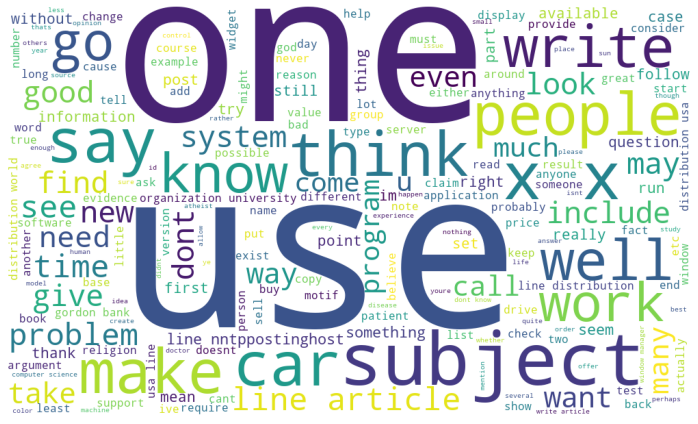

In [14]:
# Visualize the most common words with a wordcloud
atom.plot_wordcloud()

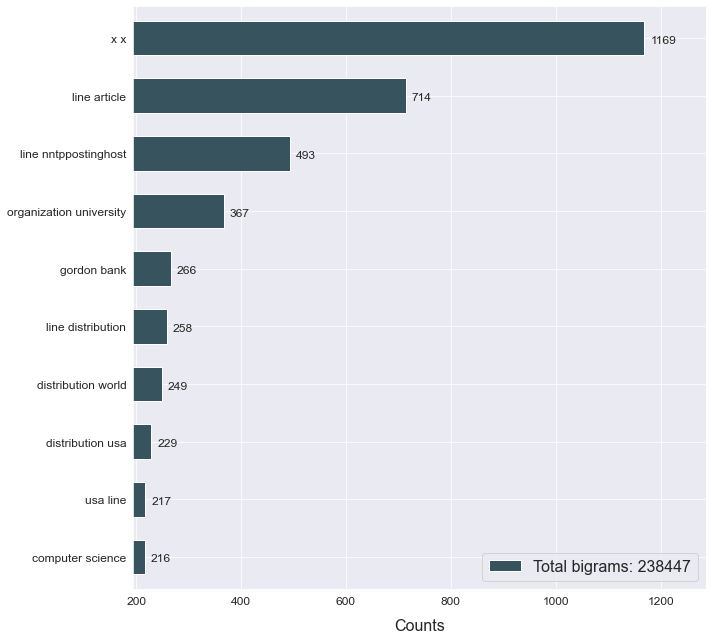

In [15]:
# Have a look at the most frequent bigrams
atom.plot_ngrams(2)

In [16]:
# Create the bigrams using the tokenizer
atom.tokenize(bigram_freq=215)

Tokenizing the corpus...
 --> Creating 10 bigrams on 4178 locations.


In [17]:
atom.bigrams

,bigram,frequency
0,x_x,1169
1,line_article,714
2,line_nntppostinghost,493
3,organization_university,367
4,gordon_bank,266
5,line_distribution,258
6,distribution_world,249
7,distribution_usa,229
8,usa_line,217
9,computer_science,216


In [18]:
# As a last step before modelling, convert the words to vectors
atom.vectorize(strategy="tfidf")

Fitting Vectorizer...
Vectorizing the corpus...


In [19]:
# The dimensionality of the dataset has increased a lot!
atom.shape

(2846, 27734)

In [20]:
# Note that the data is sparse and the columns are named
# after the words they are embedding
atom.dtypes

00          Sparse[float64, 0]
000         Sparse[float64, 0]
000000e5    Sparse[float64, 0]
00000ee5    Sparse[float64, 0]
000010af    Sparse[float64, 0]
                   ...        
zvonko      Sparse[float64, 0]
zyklonb     Sparse[float64, 0]
zz          Sparse[float64, 0]
zzzs        Sparse[float64, 0]
target                   int64
Length: 27734, dtype: object

In [21]:
# When the dataset is sparse, stats() shows the density
atom.stats()

Dataset stats ==================== >>
Shape: (2846, 27734)
Memory: 3.18 MB
Sparse: True
Density: 0.32%
-------------------------------------
Train set size: 1993
Test set size: 853
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   480 (1.0) |   336 (1.0) |   144 (1.0) |
| 1 |   593 (1.2) |   415 (1.2) |   178 (1.2) |
| 2 |   585 (1.2) |   410 (1.2) |   175 (1.2) |
| 3 |   594 (1.2) |   416 (1.2) |   178 (1.2) |
| 4 |   594 (1.2) |   416 (1.2) |   178 (1.2) |


In [22]:
# Check which models have support for sparse matrices
atom.available_models()[["acronym", "fullname", "accepts_sparse"]]

,acronym,fullname,accepts_sparse
0,Dummy,Dummy Estimator,False
1,GP,Gaussian Process,False
2,GNB,Gaussian Naive Bayes,False
3,MNB,Multinomial Naive Bayes,True
4,BNB,Bernoulli Naive Bayes,True
5,CatNB,Categorical Naive Bayes,True
6,CNB,Complement Naive Bayes,True
7,Ridge,Ridge Estimator,True
8,Perc,Perceptron,False
9,LR,Logistic Regression,True


In [23]:
# Train the model
atom.run(models="RF", metric="f1_weighted")


Training ========================= >>
Models: RF
Metric: f1_weighted


Results for Random Forest:
Fit ---------------------------------------------
Train evaluation --> f1_weighted: 1.0
Test evaluation --> f1_weighted: 0.9301
Time elapsed: 31.368s
-------------------------------------------------
Total time: 31.369s


Final results ==================== >>
Duration: 31.369s
-------------------------------------
Random Forest --> f1_weighted: 0.9301


## Analyze results

In [24]:
atom.evaluate()

,balanced_accuracy,f1_weighted,jaccard_weighted,matthews_corrcoef,precision_weighted,recall_weighted
RF,0.929816,0.930066,0.869918,0.91278,0.933748,0.92966


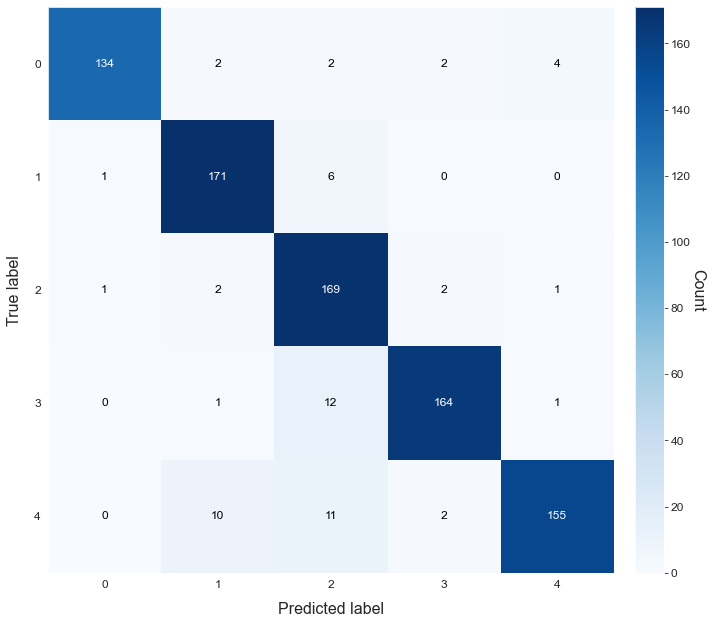

In [25]:
atom.plot_confusion_matrix(figsize=(10, 10))

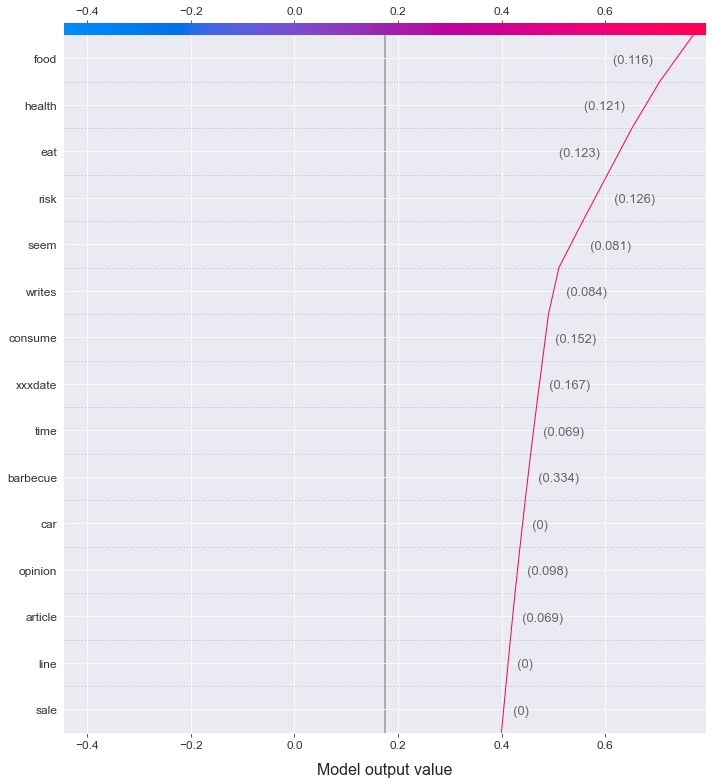

In [26]:
atom.decision_plot(index=0, target=atom.predict(0), show=15)